In [1]:
cd ~/uw-astr480-arcsat/

/home/jovyan/uw-astr480-arcsat


In [2]:
from ccd.fluxes import total_flux

/opt/conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
fluxes = total_flux('./')

fluxes ::
[np.float64(72952.43011722298), np.float64(-41524.86785042187), np.float64(26167.645405795643), np.float64(-30223.545465927178), np.float64(-665.0237589786848), np.float64(59074.16663038727), np.float64(-29408.457453400493), np.float64(83099.47342103746), np.float64(70904.37572783261), np.float64(85642.46083977997), np.float64(-20734.56332002858), np.float64(10642.281207203807), np.float64(47122.837656746975), np.float64(55773.735913952354), np.float64(-438.20907342404826), np.float64(-10023.447852853962), np.float64(-7932.508332387464), np.float64(26234.620569327002), np.float64(-7589.887284591008), np.float64(-32397.756338272564), np.float64(-37163.405329054935), np.float64(-22937.077385124838), np.float64(88553.01538727256), np.float64(-36086.8315537514), np.float64(51443.30048078329), np.float64(82178.24573589383), np.float64(-18552.135496049115), np.float64(-26695.690425179775), np.float64(-5327.087744493911), np.float64(70296.64012804581), np.float64(63672.29874548156),

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import batman
import seaborn as sns

In [15]:
t = np.linspace(0,2.37611111,104)

In [17]:
#HAT-p-36
params = batman.TransitParams()
params.t0 = 2.09222                  #time of inferior conjunction (hrs)
params.per = 31.9                    #orbital period (hrs)
params.rp = 0.13                     #planet radius (in units of stellar radii)
params.a = 5.12                      #semi-major axis (in units of stellar radii)
params.inc = 86.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = []                        #limb darkening coefficients []
params.limb_dark = "uniform"         #limb darkening model

m = batman.TransitModel(params, t)    #initializes model
curve = m.light_curve(params)         #calculates light curve

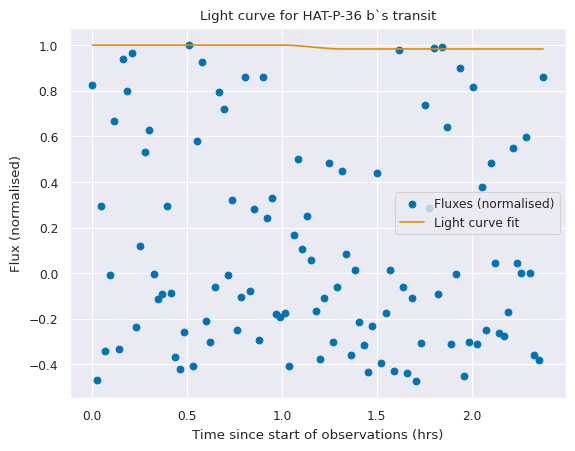

In [27]:
sns.set_theme('paper', color_codes=True, palette='colorblind', font_scale=1)

plt.scatter(t,fluxes/np.max(fluxes),label='Fluxes (normalised)')
plt.plot(t,curve,color='C1',label='Light curve fit')
plt.legend()
plt.xlabel('Time since start of observations (hrs)')
plt.ylabel('Flux (normalised)')
plt.title('Light curve for HAT-P-36 b`s transit')

plt.savefig('hatp36b.png')
#plt.ylim(0.95,1.05)

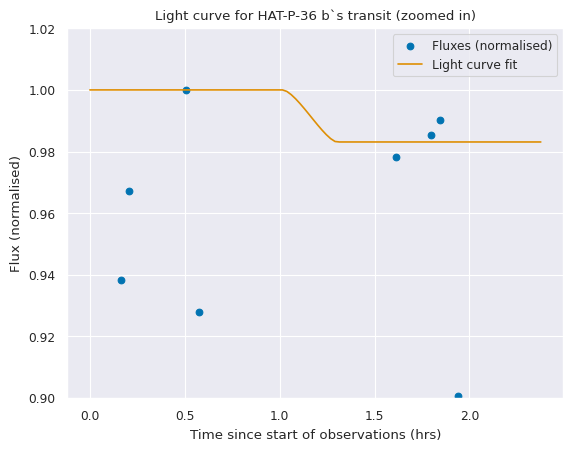

In [28]:
plt.scatter(t,fluxes/np.max(fluxes),label='Fluxes (normalised)')
plt.plot(t,curve,color='C1',label='Light curve fit')
plt.legend()
plt.xlabel('Time since start of observations (hrs)')
plt.ylabel('Flux (normalised)')
plt.title('Light curve for HAT-P-36 b`s transit (zoomed in)')
plt.ylim(0.90,1.02)

plt.savefig('hatp36b_zoom.png')